In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import pandas as pd
from pandas import DataFrame
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import statistics
import scipy.stats as stats
#import arviz

from scipy.stats import beta

from sklearn.utils import resample

import itertools

%matplotlib inline
import matplotlib as mpl

#import pymc3 as pm 
#plt.style.use('seaborn-darkgrid')
#print('Running on PyMC3 v{}'.format(pm.__version__))
print("great")

great


# Get and resample DATA

The following code brings the data into python and resamples with replacement from the dataset to create a larger simulated distribution of data. As you will see in the following, using the simulated data and the raw data does not significantly change the result. 

In [2]:
flag=[]
russ=[]
peck=[]
synu=[]
cran=[]
bifr=[]


data2=pd.read_csv("/Users/mcleanworsham/Desktop/Crangonyctid_light/data_code/behavior/BehaveData.csv")

flag1=data2["flagellatus"]
flag += flag1.tolist()
flag2=flag[0:5]
flag_boot = resample(flag2, replace=True, n_samples=500, random_state=1)

russ1=data2["russelli"]
russ += russ1.tolist()
russ2=russ[0:10]
russ_boot = resample(russ2, replace=True, n_samples=500, random_state=1)

peck1=data2["pecki"]
peck += peck1.tolist()
peck2=peck[0:5]
peck_boot = resample(peck2, replace=True, n_samples=100, random_state=1)

synu1=data2["Synurella"]
synu += synu1.tolist()
synu2=synu[0:10]
synu_boot = resample(synu2, replace=True, n_samples=500, random_state=1)

cran1=data2["Crangonyx "]
cran += cran1.tolist()
cran2=cran[0:5]
cran_boot = resample(cran2, replace=True, n_samples=500, random_state=1)

bifr1=data2["bifurcatus"]
bifr += bifr1.tolist()
bifr2=bifr[0:5]
bifr_boot = resample(bifr2, replace=True, n_samples=500, random_state=1)

print(peck2)

[0.8666666670000001, 0.7333333329999999, 0.933333333, 0.6, 0.933333333]


# Prior distributions 

The prior distribution can be thought of as the hypothesis. And comparing the observed data to the "piors" will give us an idea of how closely the observations fit our expectations. 

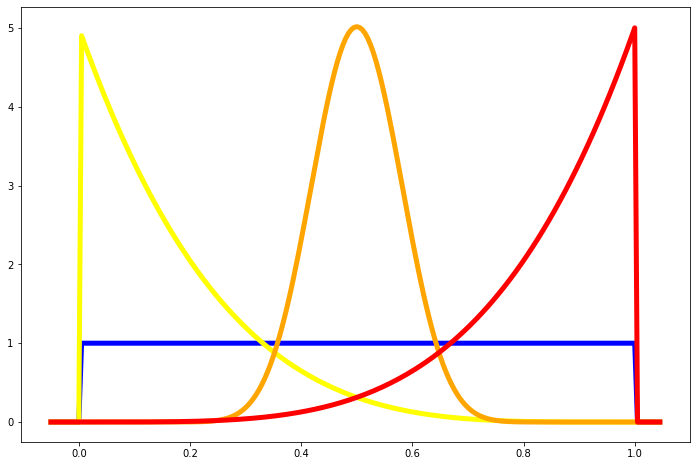

In [27]:
#this is the theorhetical distribution of the priors 

plt.figure(figsize=(12,8))

x_axis = np.arange(-.05, 1.05, 0.005)

b_dist_1 = stats.beta(1,1)
plt.plot(x_axis, b_dist_1.pdf(x_axis), label="uniform prior", linewidth=5, color='blue')

b_dist_4 = stats.beta(1,5)
plt.plot(x_axis, b_dist_4.pdf(x_axis), label="Photophilic", linewidth=5, color='yellow')

b_dist_3 = stats.beta(20,20)
plt.plot(x_axis, b_dist_3.pdf(x_axis), label="Photoneutral", linewidth=5, color='orange')

b_dist_2 = stats.beta(5,1)
plt.plot(x_axis, b_dist_2.pdf(x_axis), label="Photophobic", linewidth=5, color='red')

# Sampling from the prior

The following code will sample from the prior distributions. These distributions are beta distributions and they are defined by shape and frequency of occurrence therefore they are infinite in size and therefore sampling with replacement is not a real concept. This sampler is simply drawing at random from the shape of the distribution. After this we will have a sample distribution defined by our priors. 

0.15386425338859433
0.833996462394694


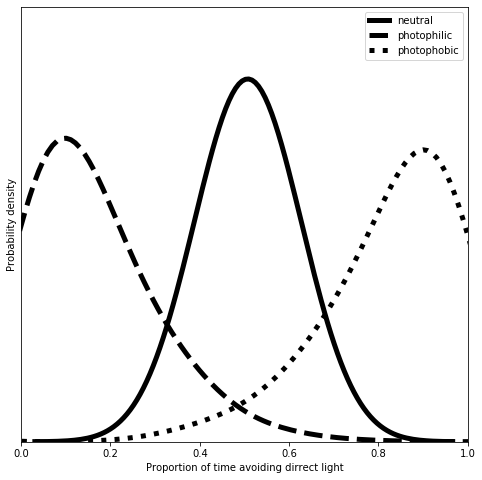

In [28]:
from scipy.stats import beta

neutral = beta.rvs(20, 20, size=500 )
photophilic = beta.rvs(1,5, size=500)
photophobic = beta.rvs(5,1, size=500)

plt.figure(figsize=(8,8))

#plt.plot([0.5, 0.5], [0.0, 4], 'k-', lw=3, color='black', linewidth=5)
#plt.plot([0.17, 0.17], [0.0, 4], 'k-', lw=3, color='black', linewidth=5)
#plt.plot([0.83, 0.83], [0.0, 4], 'k-', lw=3, color='black', linewidth=5)



sns.kdeplot(np.array(neutral), bw=.09, label="neutral", color='black', linewidth=5)
sns.kdeplot(np.array(photophilic), bw=.09, label="photophilic", color='black', linestyle='dashed', linewidth=5)
sns.kdeplot(np.array(photophobic), bw=.09, label="photophobic", color='black', linestyle='dotted', linewidth=5)
plt.yticks([])
plt.xlabel('Proportion of time avoiding dirrect light')
plt.ylabel('Probability density')

plt.xlim(xmin=0)
plt.xlim(xmax=1)
plt.ylim(ymax=4)  

#print(neutral)

print(statistics.mean(photophilic))
print(statistics.mean(photophobic))

mpl.rcParams.update({'font.size': 20})

0.16455507875889286
0.8299502929822349


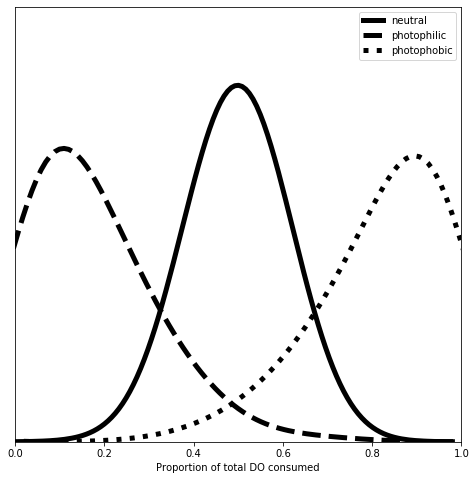

In [6]:
from scipy.stats import beta

neutral = beta.rvs(20, 20, size=500 )
photophilic = beta.rvs(1,5, size=500)
photophobic = beta.rvs(5,1, size=500)

plt.figure(figsize=(8,8))

#plt.plot([0.5, 0.5], [0.0, 4], 'k-', lw=3, color='black', linewidth=5)
#plt.plot([0.17, 0.17], [0.0, 4], 'k-', lw=3, color='black', linewidth=5)
#plt.plot([0.83, 0.83], [0.0, 4], 'k-', lw=3, color='black', linewidth=5)



sns.kdeplot(np.array(neutral), bw=.09, label="neutral", color='black', linewidth=5)
sns.kdeplot(np.array(photophilic), bw=.09, label="photophilic", color='black', linestyle='dashed', linewidth=5)
sns.kdeplot(np.array(photophobic), bw=.09, label="photophobic", color='black', linestyle='dotted', linewidth=5)
plt.yticks([])
plt.xlabel('Proportion of total DO consumed')
plt.yticks([])

plt.xlim(xmin=0)
plt.xlim(xmax=1)
plt.ylim(ymax=4)  

#print(neutral)

print(statistics.mean(photophilic))
print(statistics.mean(photophobic))

mpl.rcParams.update({'font.size': 20})

The following plots the observed data, the simulated data, and the distribution of the data sampled from the prior distribution. We now have multiple distributions we can compare the shape of. 

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  This is separate from the ipykernel package so we can avoid doing imports until


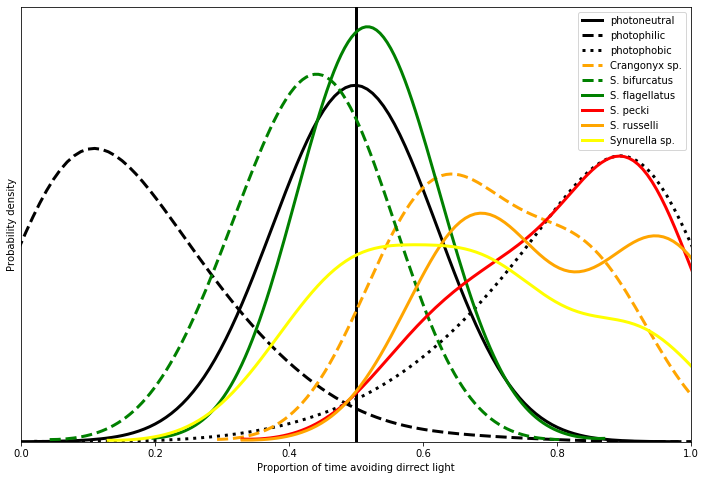

In [34]:
plt.figure(figsize=(12,8))

plt.plot([0.5, 0.5], [0.0, 5], 'k-', lw=3, color='black', linewidth=3)

sns.kdeplot(np.array(neutral), bw=.09, label="photoneutral", color='black', linewidth=3)
sns.kdeplot(np.array(photophilic), bw=.09, label="photophilic", color='black', linestyle='dashed', linewidth=3)
sns.kdeplot(np.array(photophobic), bw=.09, label="photophobic", color='black', linestyle='dotted', linewidth=3)

sns.kdeplot(np.array(cran_boot), bw=.09, label="Crangonyx sp.", color='orange', linestyle='dashed',  linewidth=3)
#sns.kdeplot(np.array(cran2), bw=.09, label="cran_raw", color='purple', linestyle='dashed')


sns.kdeplot(np.array(bifr_boot), bw=.09, label="S. bifurcatus", color='green', linestyle='dashed', linewidth=3)
#sns.kdeplot(np.array(bifr2), bw=.09, label="bifr_raw", color='purple', linestyle='dashed')


sns.kdeplot(np.array(flag_boot), bw=.09, label= "S. flagellatus", color='green',  linewidth=3)
#sns.kdeplot(np.array(flag2), bw=.09, label="flag_raw", color='green', linestyle='dashed')

sns.kdeplot(np.array(peck_boot), bw=.09, label="S. pecki", color='red',  linewidth=3)
#sns.kdeplot(np.array(peck2), bw=.09, label="peck_raw", color='red', linestyle='dashed')


sns.kdeplot(np.array(russ_boot), bw=.09, label="S. russelli", color='orange',  linewidth=3)
#sns.kdeplot(np.array(russ2), bw=.09, label="russ_raw", color='orange', linestyle='dashed')


sns.kdeplot(np.array(synu_boot), bw=.09, label="Synurella sp.", color='yellow',  linewidth=3)
#sns.kdeplot(np.array(synu2), bw=.09, label="synu_raw", color='yellow', linestyle='dashed')



#print(flag_boot)

plt.xlim(xmin=0)
plt.xlim(xmax=1)
plt.ylim(ymax=4)

_ = plt.legend()

plt.yticks([])
plt.ylabel('Probability density')
plt.xlabel('Proportion of time avoiding dirrect light')


mpl.rcParams.update({'font.size': 10})



# Bayesian model selection using Bayes factors

If our main objective is to choose only one model, the best one, from a set of models we can just choose the one with the largest p(y∣Mk). This is totally fine if all models are assumed to have the same a priori probability. Otherwise, we have to take into account that not all models are equally likely a priori and compute:

p(Mk∣y)∝p(y∣Mk)p(Mk)
Sometimes the main objective is not to just keep a single model but instead to compare models to determine which ones are more likely and by how much. This can be achieved using Bayes factors:

BF=p(y∣M0)p(y∣M1)
that is, the ratio between the marginal likelihood of two models. The larger the BF the better the model in the numerator (M0 in this example). To ease the interpretation of BFs some authors have proposed tables with levels of support or strength, just a way to put numbers into words.

1-3: anecdotal
3-10: moderate
10-30: strong
30-100: very strong
over 100: extreme

Notice that if you get numbers below 1 then the support is for the model in the denominator, tables for those cases are also available. Of course, you can also just take the inverse of the values in the above table or take the inverse of the BF value and you will be OK.

Is very important to remember that these rules are just conventions, simple guides at best. Results should always be put into context of our problems and should be accompanied with enough details so others could evaluate by themselves if they agree with our conclusions. The evidence necessary to make a claim is not the same in particle physics, or a court, or to evacuate a town to prevent hundreds of deaths.


In [30]:
def beta_binom(prior, y):
    """
    Compute the marginal likelihood, analytically, for a beta-binomial model.

    prior : tuple
        tuple of alpha and beta parameter for the prior (beta distribution)
    y : array
        array with "1" and "0" corresponding to the success and fails respectively
    """
    alpha, beta = prior
    h = np.sum(y)
    n = len(y)
    p_y = np.exp(betaln(alpha + h, beta+n-h) - betaln(alpha, beta))
    return p_y

The following plots the priors the shape of the simulated prior distributions. 

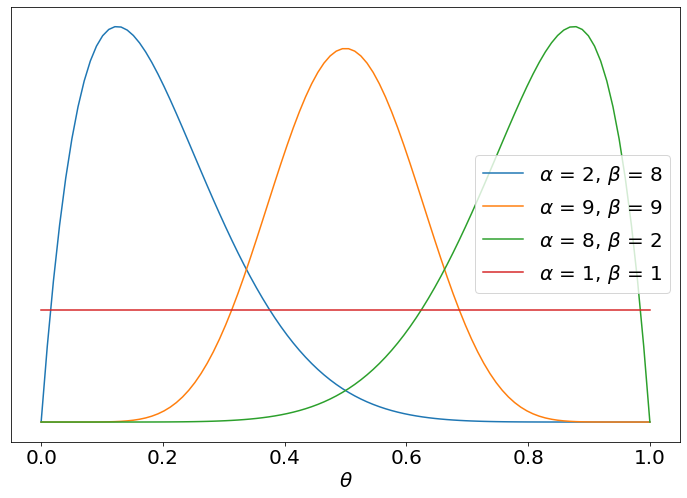

In [31]:
plt.figure(figsize=(12,8))

priors = ((2, 8), (9, 9), (8,2), (1,1))
for a, b in priors:
    distri = beta(a, b)
    x = np.linspace(0, 1, 100)
    x_pdf = distri.pdf(x)
    plt.plot (x, x_pdf, label=r'$\alpha$ = {:d}, $\beta$ = {:d}'.format(a, b))
    plt.yticks([])
    plt.xlabel('$\\theta$')
    plt.legend()

The following compares the shape of the priors to the simulated data. In this case I only ran it for Stygobromus bifurcatus but it can be ran for all species simply by redefining "y = ....." 

In [32]:
from scipy.special import betaln

y = russ_boot  #feed it the data 

BF = (beta_binom(priors[0], y) / beta_binom(priors[1], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #philic over neutral

BF = (beta_binom(priors[0], y) / beta_binom(priors[2], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #philic over phobic 

BF = (beta_binom(priors[1], y) / beta_binom(priors[0], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #neutral over philic

BF = (beta_binom(priors[1], y) / beta_binom(priors[2], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #neutral over phobic  

BF = (beta_binom(priors[2], y) / beta_binom(priors[0], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #phobic over philic 

BF = (beta_binom(priors[2], y) / beta_binom(priors[1], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #phobic over neutral 



#Example interpretation for bifurcatus 
#We see that the model with the more concentrated prior Beta(30,30) has ≈5 times more support than the model with the more extended prior Beta(1,1)
#Besides the exact numerical value this should not be surprising since the prior for the most favoured model is concentrated around θ=0.5
#and the data y has equal number of head and tails, consintent with a value of θ around 0.5.

0.0
0.0
125.0
0.0
4552.0
36.0


In [33]:
y = cran_boot  #feed it the data 

BF = (beta_binom(priors[0], y) / beta_binom(priors[1], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #philic over neutral

BF = (beta_binom(priors[0], y) / beta_binom(priors[2], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #philic over phobic 

BF = (beta_binom(priors[1], y) / beta_binom(priors[0], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #neutral over philic

BF = (beta_binom(priors[1], y) / beta_binom(priors[2], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #neutral over phobic  

BF = (beta_binom(priors[2], y) / beta_binom(priors[0], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #phobic over philic 

BF = (beta_binom(priors[2], y) / beta_binom(priors[1], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #phobic over neutral 





0.0
0.0
74.0
0.0
183.0
2.0


In [34]:
#pecki

y = peck_boot  #feed it the data 

BF = (beta_binom(priors[0], y) / beta_binom(priors[1], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #philic over neutral

BF = (beta_binom(priors[0], y) / beta_binom(priors[2], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #philic over phobic 

BF = (beta_binom(priors[1], y) / beta_binom(priors[0], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #neutral over philic

BF = (beta_binom(priors[1], y) / beta_binom(priors[2], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #neutral over phobic  

BF = (beta_binom(priors[2], y) / beta_binom(priors[0], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #phobic over philic 

BF = (beta_binom(priors[2], y) / beta_binom(priors[1], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #phobic over neutral 




0.0
0.0
106.0
0.0
2745.0
26.0


In [35]:
y = bifr_boot  #feed it the data 

BF = (beta_binom(priors[0], y) / beta_binom(priors[1], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #philic over neutral

BF = (beta_binom(priors[0], y) / beta_binom(priors[2], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #philic over phobic 

BF = (beta_binom(priors[1], y) / beta_binom(priors[0], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #neutral over philic

BF = (beta_binom(priors[1], y) / beta_binom(priors[2], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #neutral over phobic  

BF = (beta_binom(priors[2], y) / beta_binom(priors[0], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #phobic over philic 

BF = (beta_binom(priors[2], y) / beta_binom(priors[1], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #phobic over neutral 




0.0
5.0
5.0
24.0
0.0
0.0


In [36]:
y = flag_boot  #feed it the data 

BF = (beta_binom(priors[0], y) / beta_binom(priors[1], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #philic over neutral

BF = (beta_binom(priors[0], y) / beta_binom(priors[2], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #philic over phobic 

BF = (beta_binom(priors[1], y) / beta_binom(priors[0], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #neutral over philic

BF = (beta_binom(priors[1], y) / beta_binom(priors[2], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #neutral over phobic  

BF = (beta_binom(priors[2], y) / beta_binom(priors[0], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #phobic over philic 

BF = (beta_binom(priors[2], y) / beta_binom(priors[1], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #phobic over neutral 




0.0
1.0
14.0
9.0
2.0
0.0


In [37]:
y = synu_boot  #feed it the data 

BF = (beta_binom(priors[0], y) / beta_binom(priors[1], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #philic over neutral

BF = (beta_binom(priors[0], y) / beta_binom(priors[2], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #philic over phobic 

BF = (beta_binom(priors[1], y) / beta_binom(priors[0], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #neutral over philic

BF = (beta_binom(priors[1], y) / beta_binom(priors[2], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #neutral over phobic  

BF = (beta_binom(priors[2], y) / beta_binom(priors[0], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #phobic over philic 

BF = (beta_binom(priors[2], y) / beta_binom(priors[1], y)) #this is dividing prior "b" referred to as #1 by python by "a" reffered to as #0 by python. 
print(round(BF)) #phobic over neutral 




0.0
0.0
53.0
1.0
50.0
1.0


In the above bayes factors we see that bifurcatus has strong support for being photoneutral over photophobic and has marginal support for being photoneutral over photophilic and photophilic over photophobic. 

# Sequential Monte Carlo

The Sequential Monte Carlo sampler is a method that basically progresses by a series of successive interpolated (or annealed) sequences from the prior to the posterior. A nice by-product of this process is that we get an estimation of the marginal likelihood. Marginal likelihood is what we are truly after because it will tell us the likelihood of the observed data under each of the hypotheses. 

In [35]:
y=peck_boot
#y=peck2

In [36]:
n_chains = 1000

models = []
traces = []
for alpha, beta in priors:
    with pm.Model() as model:
        a = pm.Beta('a', alpha, beta)
        yl = pm.Bernoulli('yl', a, observed=y)
        trace = pm.sample(1000,
                          step=pm.SMC(),
                          random_seed=42)
        models.append(model)
        traces.append(trace)

Sample initial stage: ...
Stage: 0 Beta: 1.000 Steps: 25
Sample initial stage: ...
Stage: 0 Beta: 1.000 Steps: 25
Sample initial stage: ...
Stage: 0 Beta: 1.000 Steps: 25


In [37]:
BF_smc = models[0].marginal_likelihood / models[2].marginal_likelihood
print(round(BF_smc))

4.0


In [12]:
pm.summary(traces[0], varnames='a').round(2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
a,0.18,0.11,0.0,0.01,0.39


In [23]:
pm.summary(traces[1], varnames='a').round(2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
a,0.46,0.11,0.0,0.26,0.68


In [24]:
pm.summary(traces[2], varnames='a').round(2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
a,0.72,0.13,0.0,0.48,0.94


100%|██████████| 100/100 [00:00<00:00, 192.44it/s]


(0.0, 5)

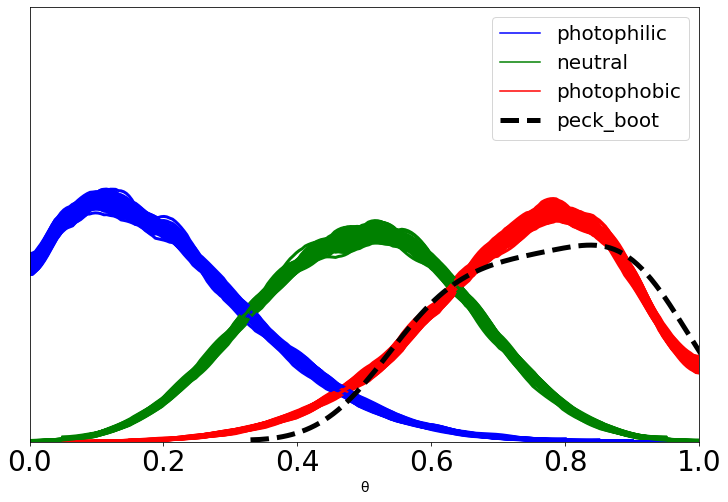

In [33]:
_, ax = plt.subplots(figsize=(12, 8))
ppc_0 = pm.sample_posterior_predictive(traces[0], 100, models[0], size=(len(y), 20))
ppc_1 = pm.sample_posterior_predictive(traces[1], 100, models[1], size=(len(y), 20))
ppc_2 = pm.sample_posterior_predictive(traces[2], 100, models[2], size=(len(y), 20))
for m_0, m_1, m_2 in zip(ppc_0['yl'].T, ppc_1['yl'].T, ppc_2['yl'].T):
    pm.kdeplot(np.mean(m_0, 0), ax=ax, plot_kwargs={'color':'blue'})
    pm.kdeplot(np.mean(m_1, 0), ax=ax, plot_kwargs={'color':'green'})
    pm.kdeplot(np.mean(m_2, 0), ax=ax, plot_kwargs={'color':'red'})
ax.plot([], label='photophilic', color='blue')
ax.plot([], label='neutral', color='green')
ax.plot([], label='photophobic', color='red')
ax.legend(fontsize=14)
ax.set_xlabel(u'θ', fontsize=14)
ax.set_yticks([]);

sns.kdeplot(np.array(peck_boot), bw=.09, label="peck_boot", color='black',  linewidth=5, linestyle='dashed')
#sns.kdeplot(np.array(peck2), bw=.09, label="peck_raw", color='red', linestyle='dashed')

plt.xlim(xmin=0)
plt.xlim(xmax=1)
plt.ylim(ymax=5)

Sample initial stage: ...
Stage: 0 Beta: 1.000 Steps: 25
Sample initial stage: ...
Stage: 0 Beta: 1.000 Steps: 25
Sample initial stage: ...
Stage: 0 Beta: 1.000 Steps: 25
Sample initial stage: ...
Stage: 0 Beta: 1.000 Steps: 25
100%|██████████| 100/100 [00:13<00:00,  7.24it/s]
Process ForkPoolWorker-5:
Process ForkPoolWorker-6:
Process ForkPoolWorker-7:
Process ForkPoolWorker-2:
Process ForkPoolWorker-1:
Process ForkPoolWorker-3:
Process ForkPoolWorker-4:
Process ForkPoolWorker-8:
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/anaconda3/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
Traceback (most recent call last):
  File "/

KeyboardInterrupt: 

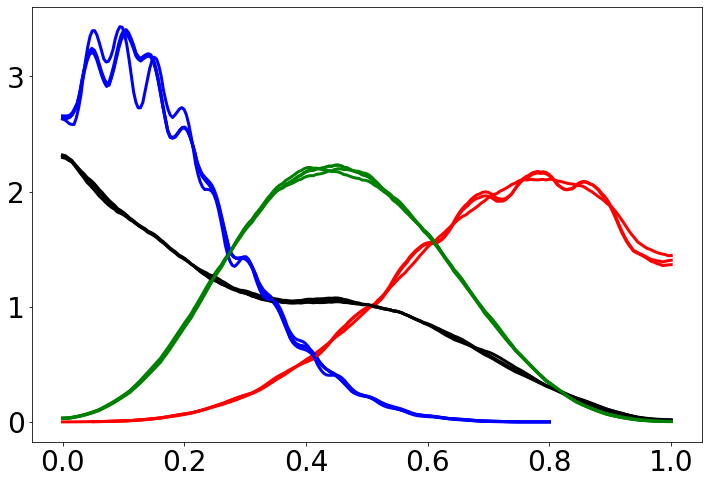

In [5]:
y=flag_boot
#y=peck2

n_chains = 1000

models = []
traces = []
for alpha, beta in priors:
    with pm.Model() as model:
        a = pm.Beta('a', alpha, beta)
        yl = pm.Bernoulli('yl', a, observed=y)
        trace = pm.sample(1000,
                          step=pm.SMC(),
                          random_seed=42)
        models.append(model)
        traces.append(trace)
        
_, ax = plt.subplots(figsize=(12, 8))
ppc_0 = pm.sample_posterior_predictive(traces[0], 100, models[0], size=(len(y), 20))
ppc_1 = pm.sample_posterior_predictive(traces[1], 100, models[1], size=(len(y), 20))
ppc_2 = pm.sample_posterior_predictive(traces[2], 100, models[2], size=(len(y), 20))
ppc_3 = pm.sample_posterior_predictive(traces[3], 100, models[3], size=(len(y), 20))
for m_0, m_1, m_2, m_3 in zip(ppc_0['yl'].T, ppc_1['yl'].T, ppc_2['yl'].T, ppc_3['yl'].T):
    pm.kdeplot(np.mean(m_0, 0), ax=ax, plot_kwargs={'color':'blue'})
    pm.kdeplot(np.mean(m_1, 0), ax=ax, plot_kwargs={'color':'green'})
    pm.kdeplot(np.mean(m_2, 0), ax=ax, plot_kwargs={'color':'red'})
    pm.kdeplot(np.mean(m_3, 0), ax=ax, plot_kwargs={'color':'black'})
ax.plot([], label='photophilic', color='blue')
ax.plot([], label='neutral', color='green')
ax.plot([], label='photophobic', color='red')
ax.plot([], label='uniform', color='black')

ax.legend(fontsize=14)
ax.set_xlabel(u'θ', fontsize=14)
ax.set_yticks([]);

sns.kdeplot(np.array(peck_boot), bw=.09, label="pecki", color='black',  linewidth=5, linestyle='dashed')
#sns.kdeplot(np.array(peck2), bw=.09, label="peck_raw", color='red', linestyle='dashed')

plt.xlim(xmin=0)
plt.xlim(xmax=1)
plt.ylim(ymax=5)

In [ ]:
y=cran_boot
#y=peck2

n_chains = 1000

models = []
traces = []
for alpha, beta in priors:
    with pm.Model() as model:
        a = pm.Beta('a', alpha, beta)
        yl = pm.Bernoulli('yl', a, observed=y)
        trace = pm.sample(1000,
                          step=pm.SMC(),
                          random_seed=42)
        models.append(model)
        traces.append(trace)
        
_, ax = plt.subplots(figsize=(12, 8))
ppc_0 = pm.sample_posterior_predictive(traces[0], 100, models[0], size=(len(y), 20))
ppc_1 = pm.sample_posterior_predictive(traces[1], 100, models[1], size=(len(y), 20))
ppc_2 = pm.sample_posterior_predictive(traces[2], 100, models[2], size=(len(y), 20))
for m_0, m_1, m_2 in zip(ppc_0['yl'].T, ppc_1['yl'].T, ppc_2['yl'].T):
    pm.kdeplot(np.mean(m_0, 0), ax=ax, plot_kwargs={'color':'blue'})
    pm.kdeplot(np.mean(m_1, 0), ax=ax, plot_kwargs={'color':'green'})
    pm.kdeplot(np.mean(m_2, 0), ax=ax, plot_kwargs={'color':'red'})
ax.plot([], label='photophilic', color='blue')
ax.plot([], label='neutral', color='green')
ax.plot([], label='photophobic', color='red')
ax.legend(fontsize=14)
ax.set_xlabel(u'θ', fontsize=14)
ax.set_yticks([]);

sns.kdeplot(np.array(cran_boot), bw=.09, label="Crangonyx", color='black',  linewidth=5, linestyle='dashed')
#sns.kdeplot(np.array(peck2), bw=.09, label="peck_raw", color='red', linestyle='dashed')

plt.xlim(xmin=0)
plt.xlim(xmax=1)
plt.ylim(ymax=5)